# Plot the calibrated results from XGBoost non-imputed

In [13]:
import pandas as pd
import numpy as np
import pickle
import sys
sys.path.append('../../onc_functions')

#import custom plotting functions
from plot_functions import (onc_plot_calibration_curve,
                            onc_calc_cm, 
                            onc_plot_roc, 
                            onc_plot_precision_recall, 
                            onc_plot_risk, 
                            onc_plot_roc_no_threshold)

In [14]:
# load results from the calibrated model
with open('./roc_auc/y_calibrated_xgb_nonimputed.pickle', 'rb') as picklefile:  
            calibrated_results = pickle.load(picklefile)

In [15]:
calibrated_results.head()

,score,y,usrds_id,subset,p_calibrated
0,0.580939,1,31089.0,9,0.294018
3,0.274023,0,50506.0,9,0.102941
9,0.332714,0,157169.0,9,0.138813
12,0.128133,0,310420.0,9,0.039980
14,0.285353,0,343742.0,9,0.110308


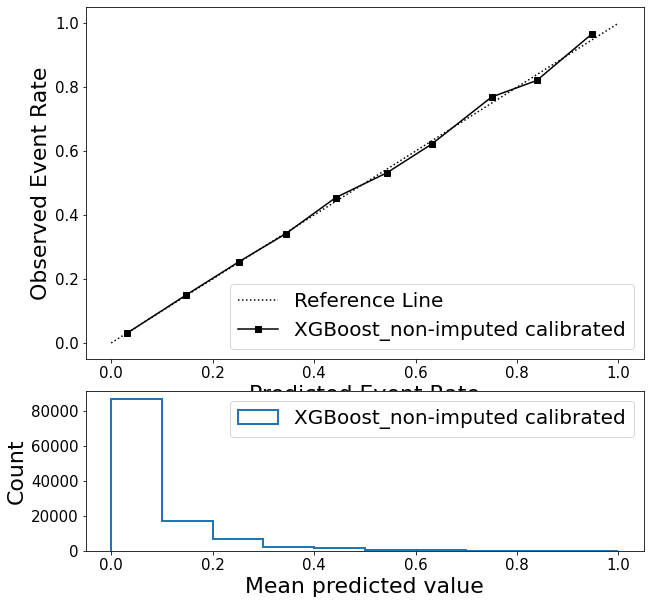

In [16]:
onc_plot_calibration_curve(
                y_true=calibrated_results.y, 
                y_proba=calibrated_results.p_calibrated, 
                label='XGBoost_non-imputed calibrated',
                filename='./roc_auc/xgb_nonimputed_calibrated')

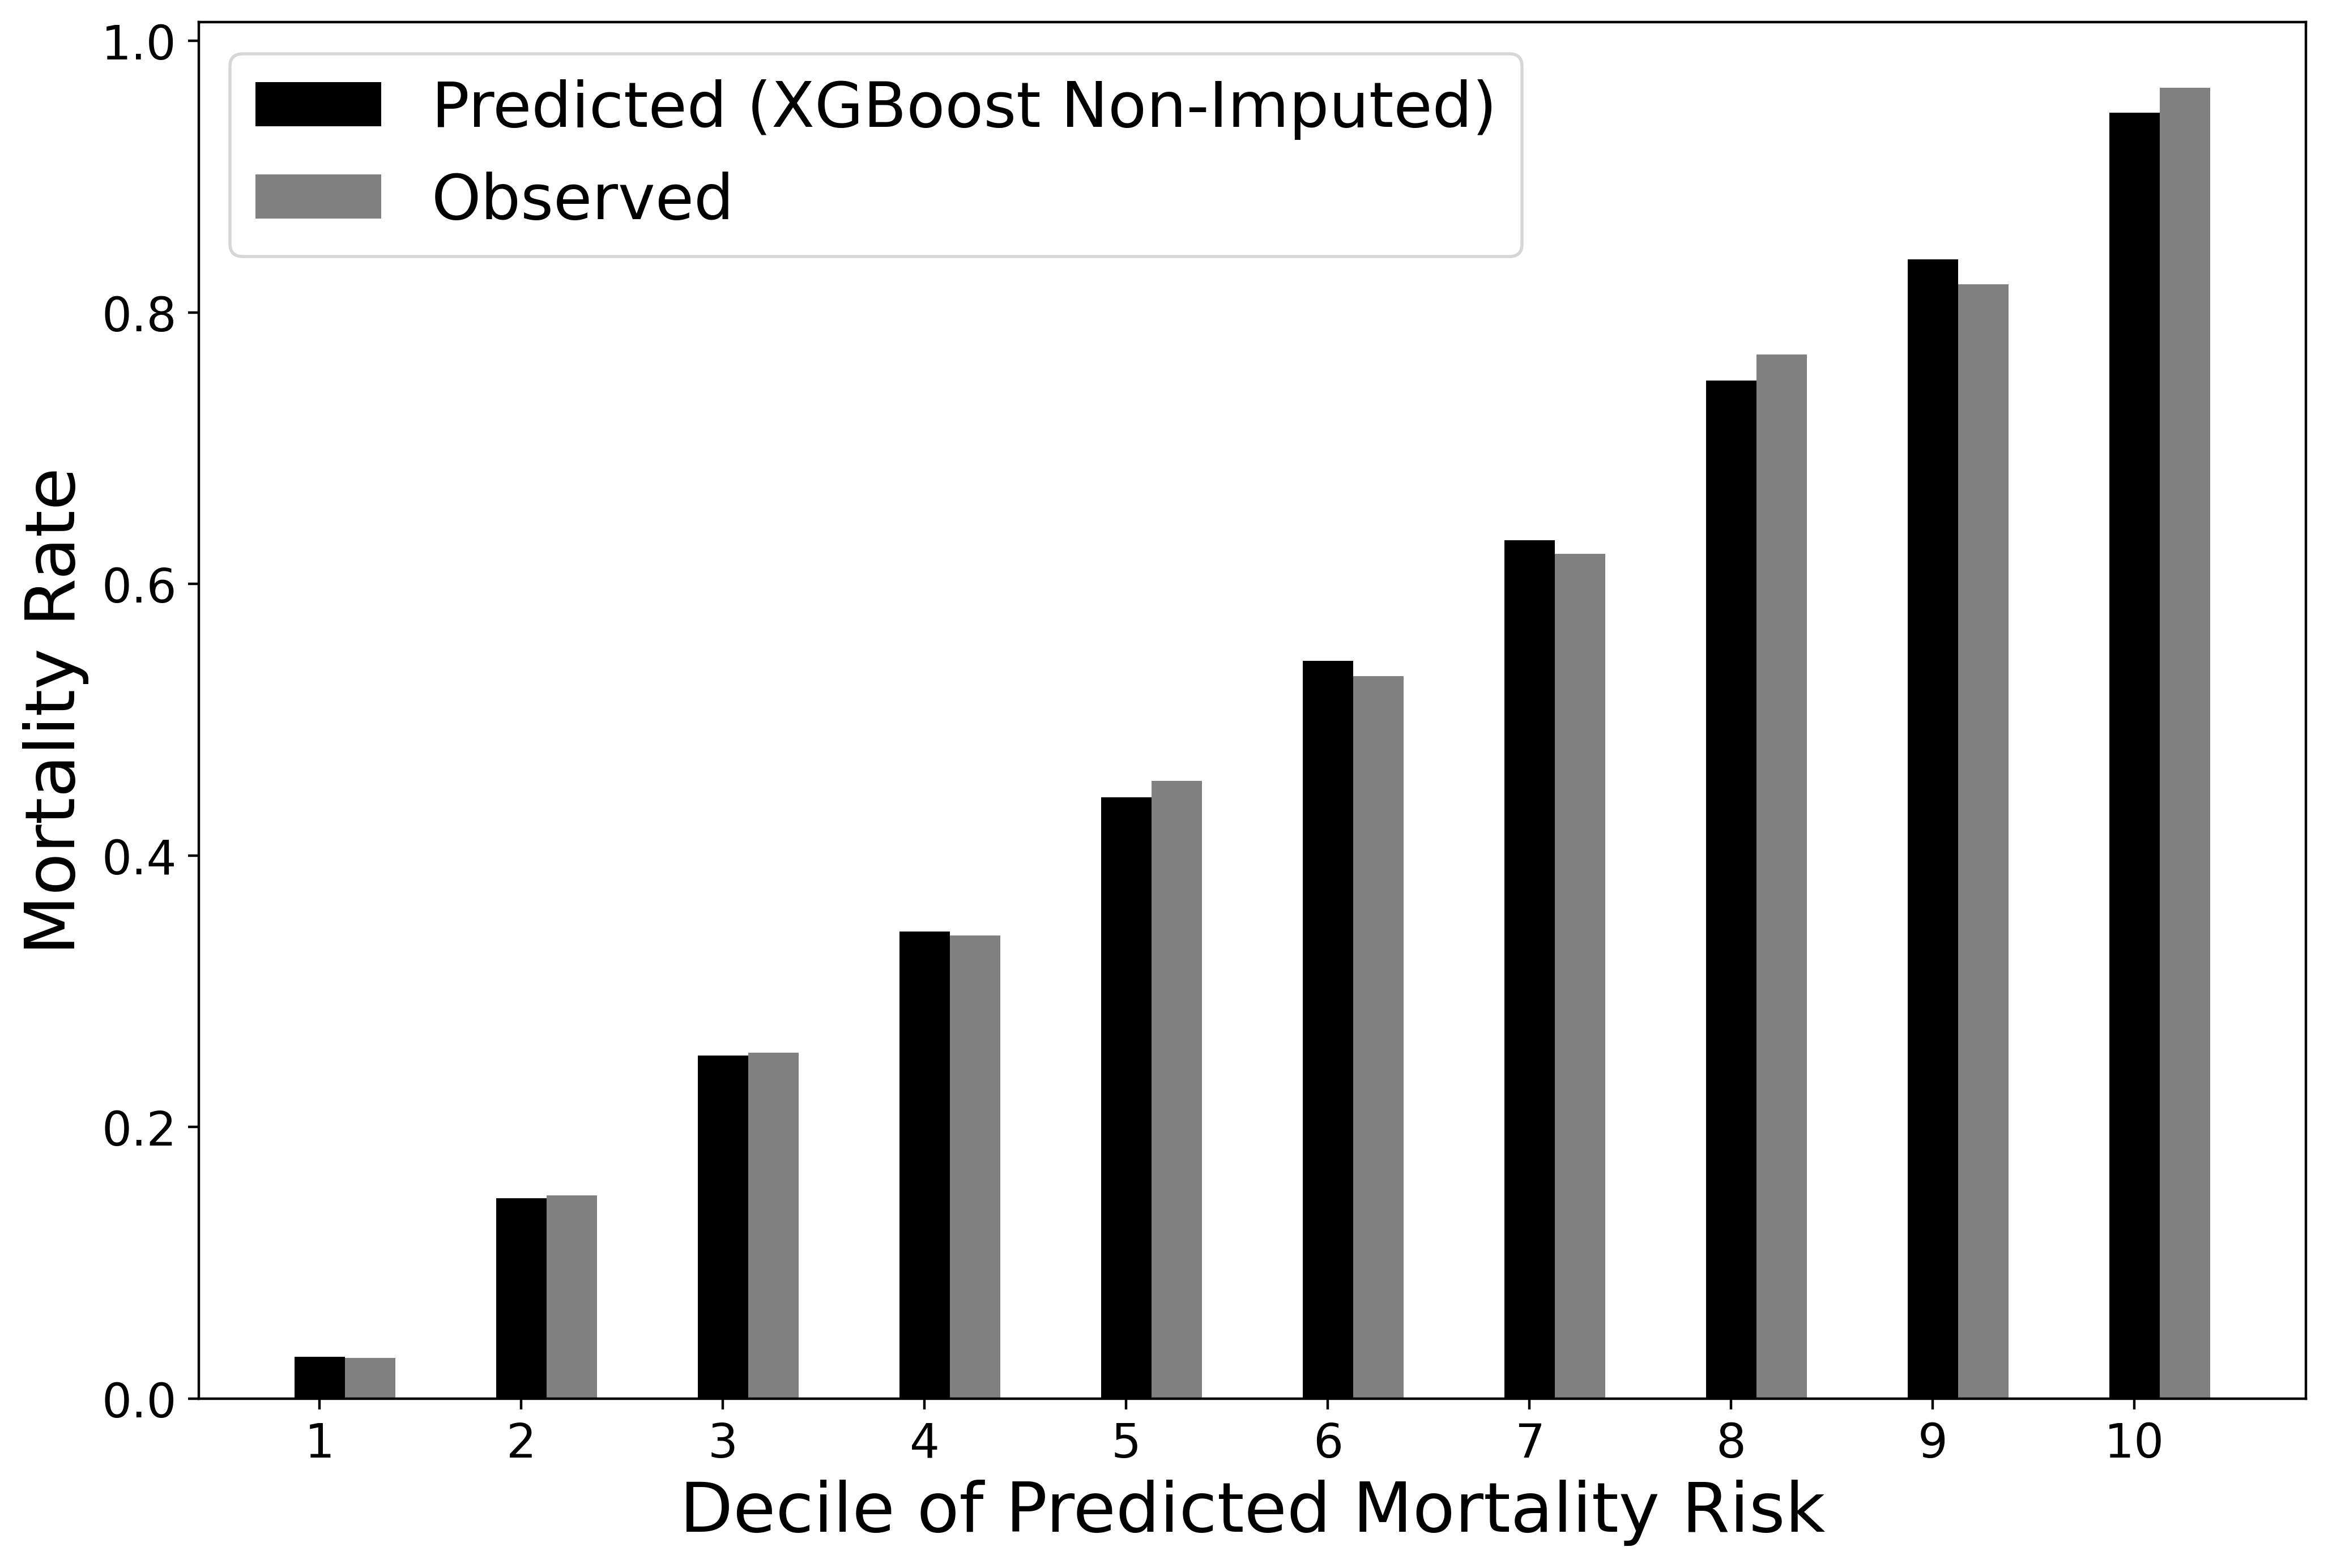

In [17]:
onc_plot_risk(
    y_true=calibrated_results.y, 
    y_proba=calibrated_results.p_calibrated,
    label='Predicted (XGBoost Non-Imputed)',
    filename='xgb_nonimputed_mortality_bar')

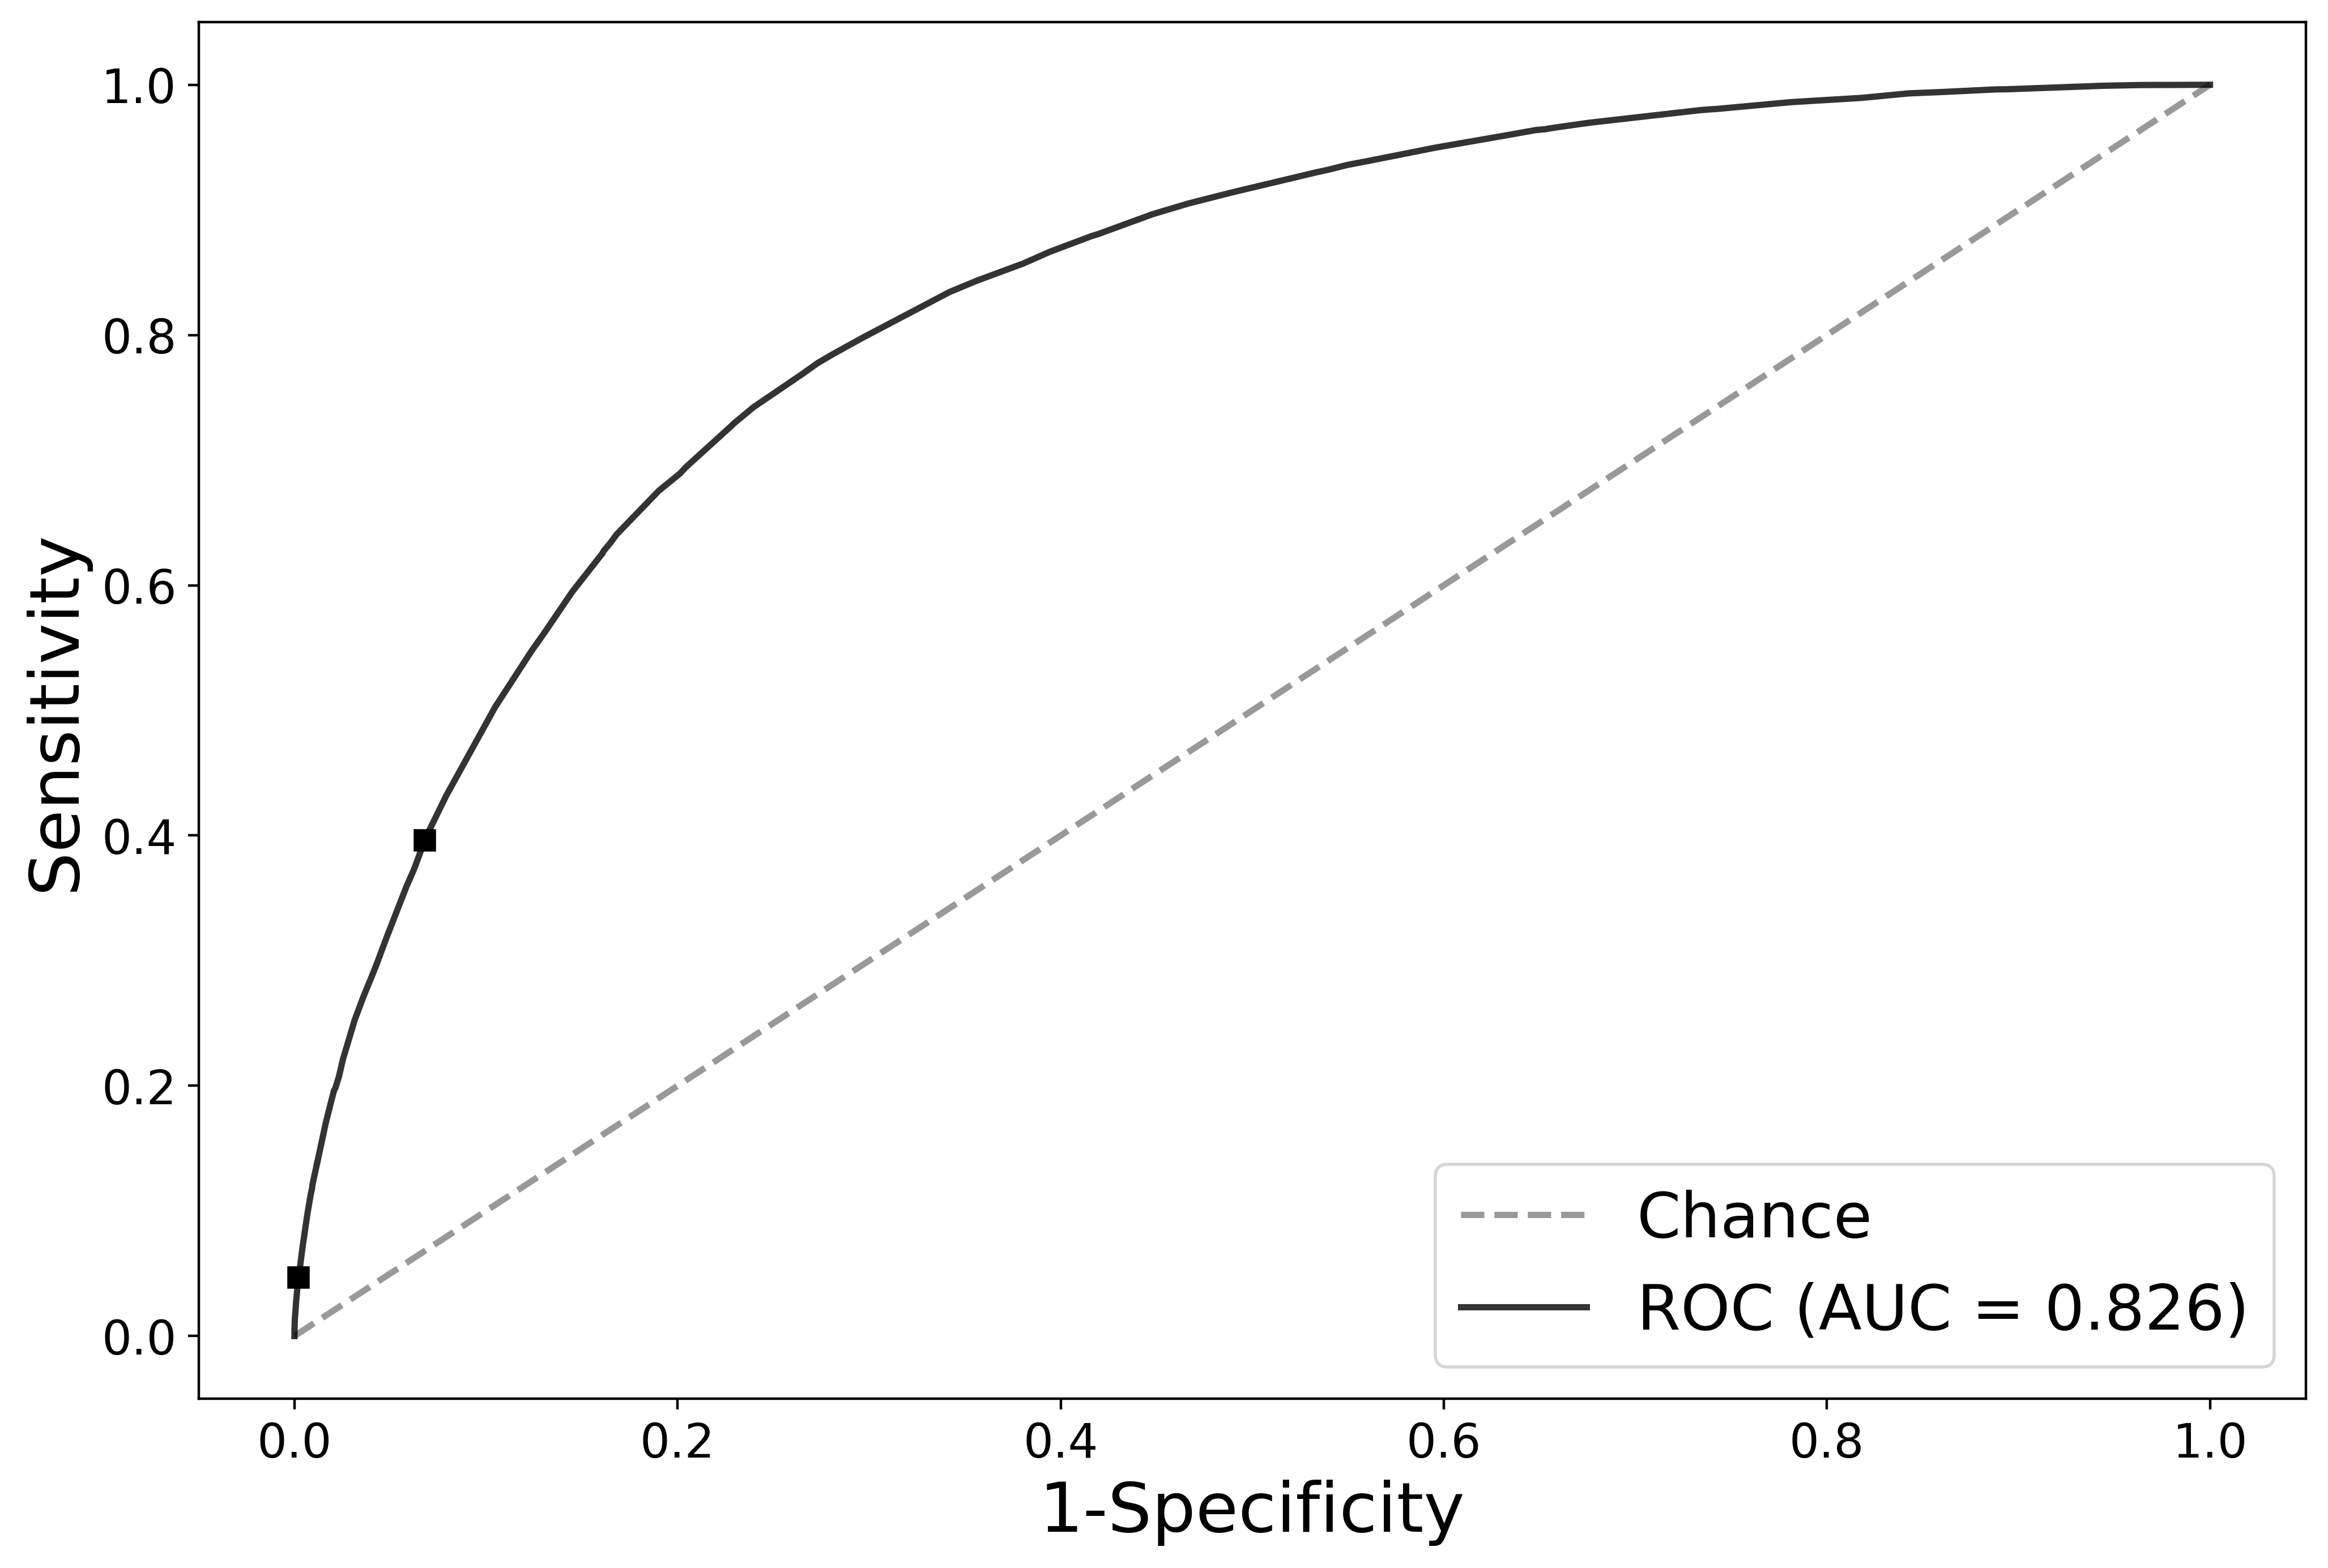

In [18]:
onc_plot_roc(
            y_true=calibrated_results.y, 
            y_pred=calibrated_results.p_calibrated, 
            model_name='xgb_nonimputed');

In [19]:
cm = onc_calc_cm(
    calibrated_results.y, 
    calibrated_results.p_calibrated, 
    range_probas=[.10,.20, .30, .40, .50])
cm

,threshold,sensitivity,specificity,likelihood_ratio_neg,likelihood_ratio_pos,tp,fp,tn,fn,total_survived,total_deceased
0.1,0.1,0.694337,0.795667,0.384159,3.39807,5947,21712,84546,2618,106258,8565
0.2,0.2,0.396264,0.931967,0.647808,5.82462,3394,7229,99029,5171,106258,8565
0.3,0.3,0.199533,0.978364,0.818169,9.22226,1709,2299,103959,6856,106258,8565
0.4,0.4,0.120957,0.990589,0.887394,12.8527,1036,1000,105258,7529,106258,8565
0.5,0.5,0.0463514,0.997798,0.955753,21.0479,397,234,106024,8168,106258,8565


In [20]:
#save (for the aucroc evaluated model)
cm.to_csv('./roc_auc/2021_xgb_nonimputed_calibrated_confusion_matrix.csv')